In [2]:
# 1. Import thư viện cần thiết
import matplotlib.pyplot as plt
import cv2
import numpy as np
import tensorflow
from tensorflow import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
# 2. Đọc và xử lý trước dữ liệu
data = pd.read_csv(r"datas/emnist-letters-train.csv").astype('float32')

print(data.head(10))

     23    0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  ...  0.406  0.407  \
0   7.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
1  16.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
2  15.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
3  23.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
4  17.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
5  13.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
6  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
7  22.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
8  24.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   
9  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0   

   0.408  0.409  0.410  0.411  0.412  0.413  0.414  0.415  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1    0.0    0.0    0.0    0.0    0.0    0.0    0.0    

In [5]:
## Chia dữ liệu thành hình ảnh và nhãn của chúng
X = data.drop('23', axis=1)
y = data['23']

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2)

## Định hình lại tập huấn thành hình ảnh.
train_x = np.reshape(train_x.values, (train_x.shape[0], 28, 28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28, 28))

In [7]:
train_x.shape

(71039, 28, 28)

In [8]:
test_x.shape

(17760, 28, 28)

In [9]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

C:\Users\truon\AppData\Local\Temp\ipykernel_40348\1297828988.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  y_int = np.int0(y)


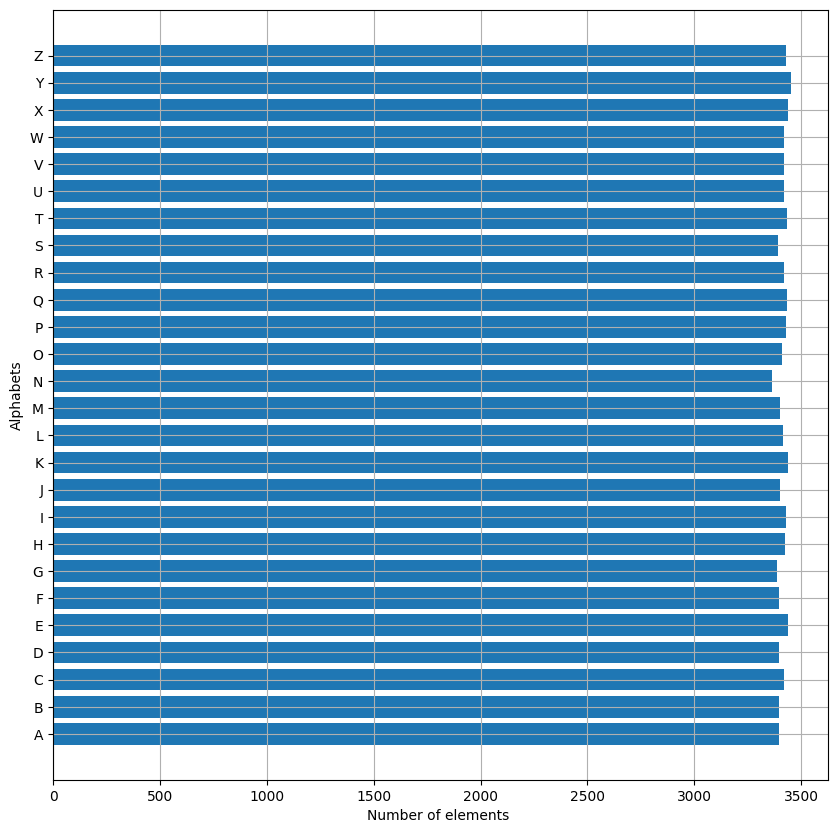

In [10]:
# 3. Vẽ số chữ cái trong tập dữ liệu ==> Hiểu rõ hơn về tập dữ liệu phân phối 
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i-1] += 1

    alphabets = []
    for i in word_dict.values():
        alphabets.append(i)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

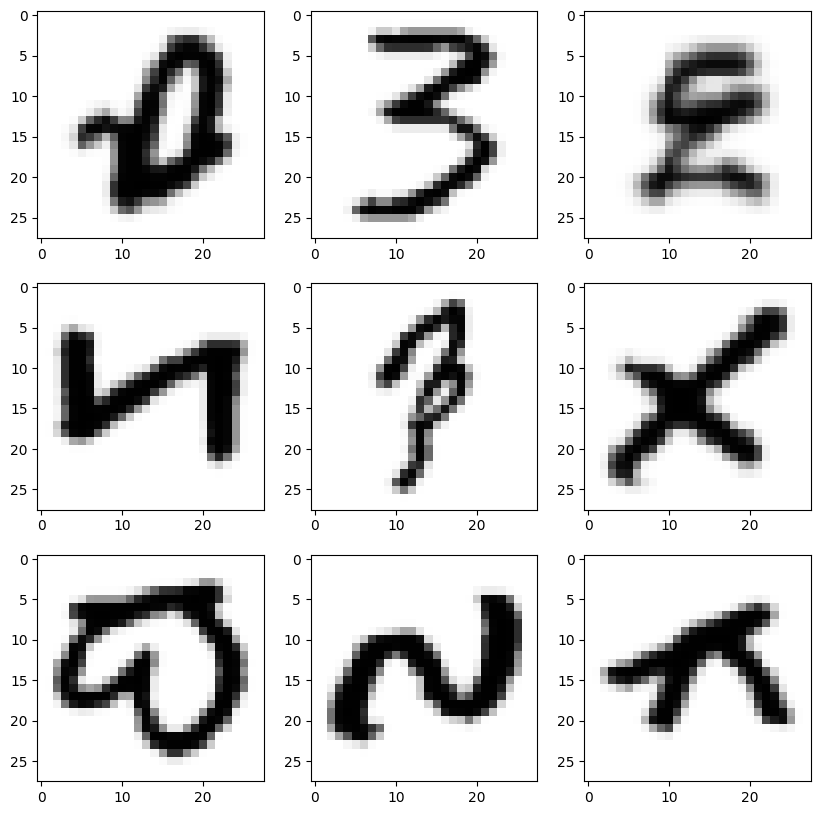

In [13]:
# 4. Shuffling the data
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28, 28)), cmap="Greys")
plt.show()
    

In [14]:
# Reshaping the train & set dataset to put in model
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)
print("New shape of train data: ", train_X.shape)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)


New shape of train data:  (71039, 28, 28, 1)
New shape of train data:  (17760, 28, 28, 1)


In [15]:
train_y_adjusted = train_y - 1
test_y_adjusted = test_y - 1

train_yOHE = to_categorical(train_y_adjusted, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y_adjusted, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (71039, 26)
New shape of test labels:  (17760, 26)


In [16]:
# Create Model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))


model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='valid'))
model.add(MaxPool2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(26, activation='softmax'))


In [17]:
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['accuracy'])


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [19]:
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback =tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

history = model.fit(train_X, train_yOHE, epochs=10, validation_data=(test_X, test_yOHE), callbacks=[tensorboard_callback])


Epoch 1/10
2220/2220 [==============================] - 48s 21ms/step - loss: 0.6299 - accuracy: 0.8109 - val_loss: 0.3048 - val_accuracy: 0.8985
Epoch 2/10
2220/2220 [==============================] - 49s 22ms/step - loss: 0.2839 - accuracy: 0.9055 - val_loss: 0.2574 - val_accuracy: 0.9166
Epoch 3/10
2220/2220 [==============================] - 50s 23ms/step - loss: 0.2326 - accuracy: 0.9219 - val_loss: 0.2607 - val_accuracy: 0.9177
Epoch 4/10
2220/2220 [==============================] - 47s 21ms/step - loss: 0.2067 - accuracy: 0.9284 - val_loss: 0.2354 - val_accuracy: 0.9211
Epoch 5/10
2220/2220 [==============================] - 49s 22ms/step - loss: 0.1880 - accuracy: 0.9349 - val_loss: 0.2667 - val_accuracy: 0.9191
Epoch 6/10
2220/2220 [==============================] - 52s 24ms/step - loss: 0.1743 - accuracy: 0.9389 - val_loss: 0.2516 - val_accuracy: 0.9227
Epoch 7/10
2220/2220 [==============================] - 56s 25ms/step - loss: 0.1595 - accuracy: 0.9431 - val_loss: 0.2475 -

In [20]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.8985360264778137, 0.9166103601455688, 0.9177364706993103, 0.9211148619651794, 0.919087827205658, 0.9227477312088013, 0.9262950420379639, 0.9206644296646118, 0.9202702641487122, 0.924662172794342]
The training accuracy is : [0.8108785152435303, 0.9055307507514954, 0.921944260597229, 0.9284195899963379, 0.9348808526992798, 0.9389490485191345, 0.943101704120636, 0.9462548494338989, 0.9472402334213257, 0.9499570727348328]
The validation loss is : [0.30481258034706116, 0.25739848613739014, 0.26072031259536743, 0.23535338044166565, 0.26673203706741333, 0.25159844756126404, 0.24745555222034454, 0.2711252272129059, 0.27296608686447144, 0.25305867195129395]
The training loss is : [0.6298609375953674, 0.28392723202705383, 0.2325604408979416, 0.20673471689224243, 0.18798667192459106, 0.17432057857513428, 0.1595119833946228, 0.14963944256305695, 0.14582256972789764, 0.13630428910255432]


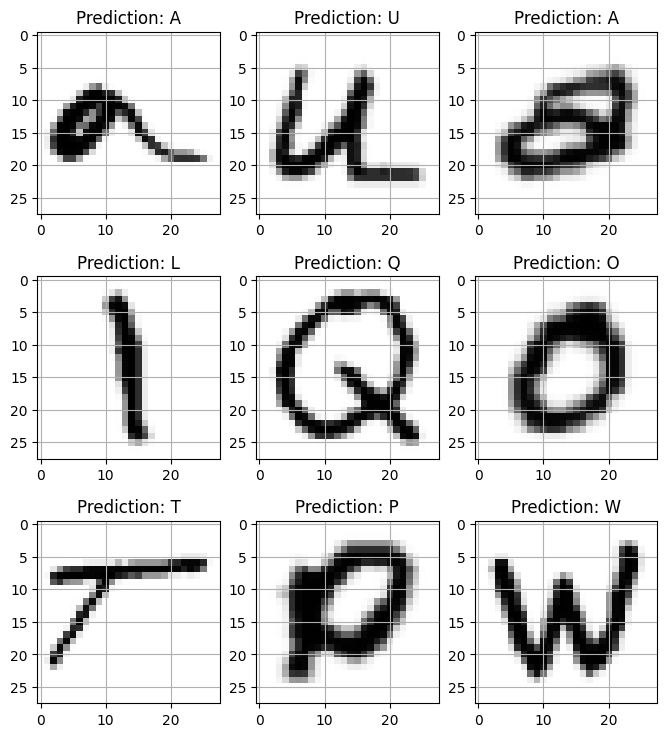

In [41]:
# Predict some test data
fig, axes = plt.subplots(3, 3, figsize=(8,9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    img = np.reshape(test_X[i], (28, 28))
    
    img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE) # Xoay ảnh 90 độ theo chiều kim đồng hồ
    img = cv2.flip(img, 1)    # Lật ảnh theo trục dọc (chiều gương)

    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: " + pred)
    ax.grid()

In [42]:
model.save('modelHandWritten.h5')

c:\Users\truon\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
model = tensorflow.keras.models.load_model('modelHandWritten.h5')


In [ ]:
# prediction on external image
img = cv2.imread(r'imgTest/s.png')

img = cv2.flip(img, 1)    # Lật ảnh theo trục dọc (chiều gương)
img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE) # Xoay ngược chiều kim đồng hồ 90 độ

img_copy = img.copy()

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (400, 400))


img_copy = cv2.GaussianBlur(img_copy, (7,7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

img_final = cv2.resize(img_thresh, (28, 28))
img_final = np.reshape(img_final, (1, 28, 28, 1))

img_pred = word_dict[np.argmax(model.predict(img_final))]

# cv2.putText(img, "Prediction: " + img_pred, (20, 410), cv2.FONT_HERSHEY_DUPLEX, 1.3, (255, 0, 30))
# cv2.imshow("result", img)

img_pred

1/1 [==============================] - 0s 111ms/step


'S'